<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/lorenz_attractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# https://www.youtube.com/watch?v=GdNjTJZnTmM

import sympy as smp
import sympy.physics.mechanics as smp_mech
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [40]:
smp_mech.init_vprinting()

sigma, rho, beta, t = smp.symbols('sigma rho beta t')
x, y, z = smp_mech.dynamicsymbols('x y z')

eq1 = sigma * (y - x)
eq2 = x * (rho - z) - y
eq3 = x * y - beta * z

f = smp.Matrix([eq1, eq2, eq3])
xyz = smp.Matrix([x, y, z])
xyz_dot = smp.diff(xyz, t)

smp.Eq(xyz_dot, f)

⎡ẋ⎤   ⎡ σ⋅(-x + y)  ⎤
⎢ ⎥   ⎢             ⎥
⎢ẏ⎥ = ⎢(ρ - z)⋅x - y⎥
⎢ ⎥   ⎢             ⎥
⎣ż⎦   ⎣ -β⋅z + x⋅y  ⎦

In [41]:
f0 = f[0].subs([(sigma, 10)])
f0_fun = smp.lambdify([x, y], f0)
f0

-10⋅x + 10⋅y

In [42]:
f1 = f[1].subs([(rho, 28)])
f1_fun = smp.lambdify([x, y, z], f1)
f1

(28 - z)⋅x - y

In [43]:
f2 = f[2].subs([(beta, 8/3)])
f2_fun = smp.lambdify([x, y, z], f2)
f2

x⋅y - 2.66666666666667⋅z

In [44]:
def lorenz(vector, t):
    x, y, z = vector

    return [
        f0_fun(x, y),
        f1_fun(x, y, z),
        f2_fun(x, y, z)
    ]

position_0 = [0.0, 1.0, 1.0]
time_points = np.linspace(0, 40, 1001)

positions_0 = odeint(lorenz, position_0, time_points)
x_sol_0, y_sol_0, z_sol_0 = positions_0[:, 0], positions_0[:, 1], positions_0[:, 2]

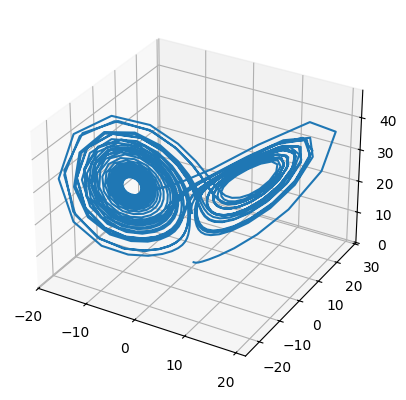

In [45]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot(x_sol_0, y_sol_0, z_sol_0)
plt.show()

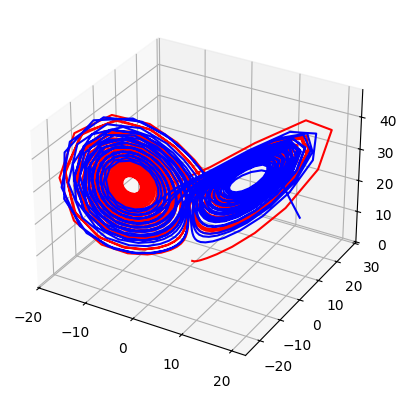

In [48]:
position_1 = [20.0, 6.1, 21.0]

positions_1 = odeint(lorenz, position_1, time_points)
x_sol_1, y_sol_1, z_sol_1 = positions_1[:, 0], positions_1[:, 1], positions_1[:, 2]

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

lorenz_plt_0, = ax.plot(x_sol_0, y_sol_0, z_sol_0, 'red')
lorenz_plt_1, = ax.plot(x_sol_1, y_sol_1, z_sol_1, 'blue')
plt.show()

In [49]:
def animate(i):
    lower_lim = max(0, i - 100)

    x_current_0 = x_sol_0[lower_lim:i + 1]
    y_current_0 = y_sol_0[lower_lim:i + 1]
    z_current_0 = z_sol_0[lower_lim:i + 1]

    x_current_1 = x_sol_1[lower_lim:i + 1]
    y_current_1 = y_sol_1[lower_lim:i + 1]
    z_current_1 = z_sol_1[lower_lim:i + 1]

    lorenz_plt_0.set_data(x_current_0, y_current_0)
    lorenz_plt_0.set_3d_properties(z_current_0)

    lorenz_plt_1.set_data(x_current_1, y_current_1)
    lorenz_plt_1.set_3d_properties(z_current_1)

ani = animation.FuncAnimation(fig, animate, frames=len(time_points))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('lorenz_attractor.gif', writer=ffmpeg_writer)